# Stage 3 (ML Modeling and Evaluation)

Anggota Team 4:
*   Akhmad Yuzfa Salvian Idris
*   Arief Rahman Hakim
*   Bernardus Valentino
*   Milenia Nadia Afifah Puspitasari
*   Sean Frederic Wijaya

## Data Pre-Processing Conclusion

- Data awal : 4888 rows x 20 columns
- Data setelah pre-processing (sampai encoding): 4787 rows x 34 columns (masih ada kolom CustomerID)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    plt.show()

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [3]:
df = pd.read_csv('Data.csv')
df

,CustomerID,ProdTaken,Age,NumberOfPersonVisiting,NumberOfFollowups,NumberOfChildrenVisiting,NumberOfTrips_std,MonthlyIncome_std,DurationOfPitch_std,TypeofContact_label,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,3.0,0.0,-1.232865,-0.488510,-1.164769,1,...,0,0,0,1,0,0,0,1,0,0
1,200001,0,49.0,3,4.0,2.0,-0.666480,-0.664917,-0.166872,0,...,0,1,0,0,0,0,0,1,0,0
2,200002,1,37.0,3,4.0,0.0,2.165440,-1.286327,-0.915295,1,...,0,0,0,1,0,0,1,0,0,0
3,200003,0,33.0,2,3.0,1.0,-0.666480,-1.118914,-0.790558,0,...,0,1,0,0,0,0,1,0,0,0
4,200004,0,35.0,2,3.0,0.0,-1.232865,-1.004648,-0.915295,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,204883,1,49.0,3,5.0,1.0,-0.666480,0.652718,-0.790558,1,...,0,0,0,0,1,0,0,1,0,0
4783,204884,1,28.0,4,5.0,2.0,-0.100096,-0.443744,1.953659,0,...,0,0,0,1,0,0,1,0,0,0
4784,204885,1,52.0,4,4.0,3.0,2.165440,1.724650,0.207339,1,...,0,0,1,0,0,0,0,0,1,0
4785,204886,1,19.0,3,4.0,2.0,-0.100096,-0.632415,0.082602,1,...,0,0,0,1,0,0,1,0,0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    4787 non-null   int64  
 1   ProdTaken                     4787 non-null   int64  
 2   Age                           4787 non-null   float64
 3   NumberOfPersonVisiting        4787 non-null   int64  
 4   NumberOfFollowups             4787 non-null   float64
 5   NumberOfChildrenVisiting      4787 non-null   float64
 6   NumberOfTrips_std             4787 non-null   float64
 7   MonthlyIncome_std             4787 non-null   float64
 8   DurationOfPitch_std           4787 non-null   float64
 9   TypeofContact_label           4787 non-null   int64  
 10  Passport_label                4787 non-null   int64  
 11  OwnCar_label                  4787 non-null   int64  
 12  Gender_label                  4787 non-null   int64  
 13  Pre

## Membagi Data Test dan Data Training

In [4]:
from sklearn.model_selection import train_test_split

X = df[list(df.columns[2:])]
Y = df[['ProdTaken']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [5]:
df.shape

(4787, 34)

In [6]:
X_train.shape

(3829, 32)

In [7]:
X_test.shape

(958, 32)

## Imbalanced Dataset

In [8]:
y_train['ProdTaken'].value_counts()

0    3120
1     709
Name: ProdTaken, dtype: int64

In [9]:
x = X_train[[col for col in X_train.columns if (str(X_train[col].dtype) != 'object')]]
y = y_train['ProdTaken'].values
print(x.shape)
print(y.shape)

(3829, 32)
(3829,)


In [10]:
from imblearn import over_sampling
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    3120
1    1560
dtype: int64


In [11]:
data = x_over_SMOTE
data['target'] = pd.DataFrame(y_over_SMOTE)
data

,Age,NumberOfPersonVisiting,NumberOfFollowups,NumberOfChildrenVisiting,NumberOfTrips_std,MonthlyIncome_std,DurationOfPitch_std,TypeofContact_label,Passport_label,OwnCar_label,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,target
0,50.000000,3,3.000000,0.000000,0.466288,1.142691,1.828922,1,1,0,...,1,0,0,0,1,0,0,0,0,0
1,33.000000,3,5.000000,2.000000,1.599056,-0.516923,-0.790558,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,32.000000,3,1.000000,2.000000,-1.232865,-1.039398,-0.541083,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,38.000000,3,5.000000,2.000000,2.165440,1.206877,-1.040032,1,0,1,...,0,1,0,0,0,0,0,1,0,1
4,35.000000,3,4.000000,2.000000,-1.232865,-1.002399,2.452607,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,35.000000,3,3.932495,0.067505,1.484355,-0.288855,-0.682661,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4676,45.756456,3,5.512912,2.756456,-0.666480,2.665028,-0.851315,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4677,45.718825,3,4.000000,2.000000,-0.507227,0.369763,0.203376,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4678,34.650522,2,5.650522,1.650522,-0.666480,-0.395926,-0.291609,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [12]:
print('Original')
print(pd.Series(y).value_counts())
print('')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    3120
1     709
dtype: int64

SMOTE
0    3120
1    1560
dtype: int64


## Data Split Conclusion

- Data training : 3829 rows x 33 columns (minus feature CustomerID)
- Data training setelah imbalancing : 4680 rows x 33 columns
    - Target 0: 3120
    - Target 1: 1560
- Data testing : 958 rows x 33 columns

# Classification Model

---

## Logistic Regression
sklearn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression

start = time.time()
logres = LogisticRegression(random_state=42)
logres.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = logres.predict(X_test)

The time of execution of above program is : 0.09498214721679688


### Evaluation

In [14]:
eval_classification(logres, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.81
Recall (Test Set): 0.31
F1-Score (Test Set): 0.45
AUC: 0.64


In [15]:
from sklearn.metrics import precision_score

y_pred_test = logres.predict(X_test)
y_pred_train = logres.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))

Precision (Train Set): 0.70
Precision (Test Set): 0.81


Underfit/Bestfit?

In [16]:
from sklearn.metrics import classification_report

print('\nclassification report')
print(classification_report(y_test, y_pred_test)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       759
           1       0.81      0.31      0.45       199

    accuracy                           0.84       958
   macro avg       0.83      0.64      0.68       958
weighted avg       0.84      0.84      0.81       958



In [17]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[745,  14],
       [138,  61]], dtype=int64)

### Feature Importance

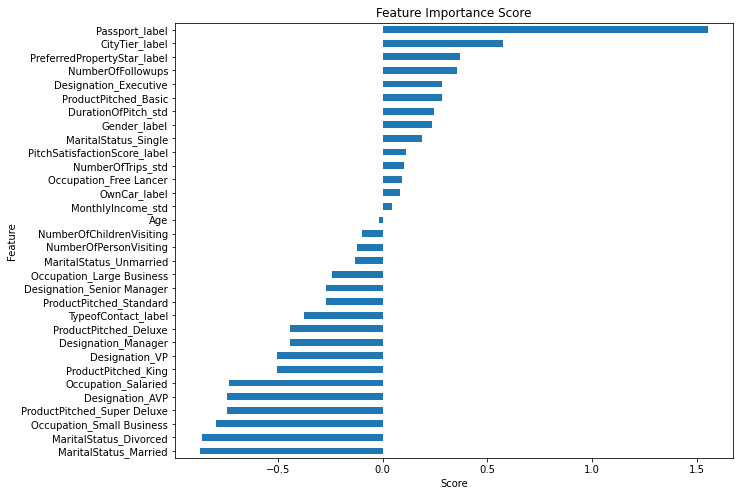

In [18]:
feat_importances = pd.Series(logres.coef_[0], index=X.columns)
ax = feat_importances.nlargest(32).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html

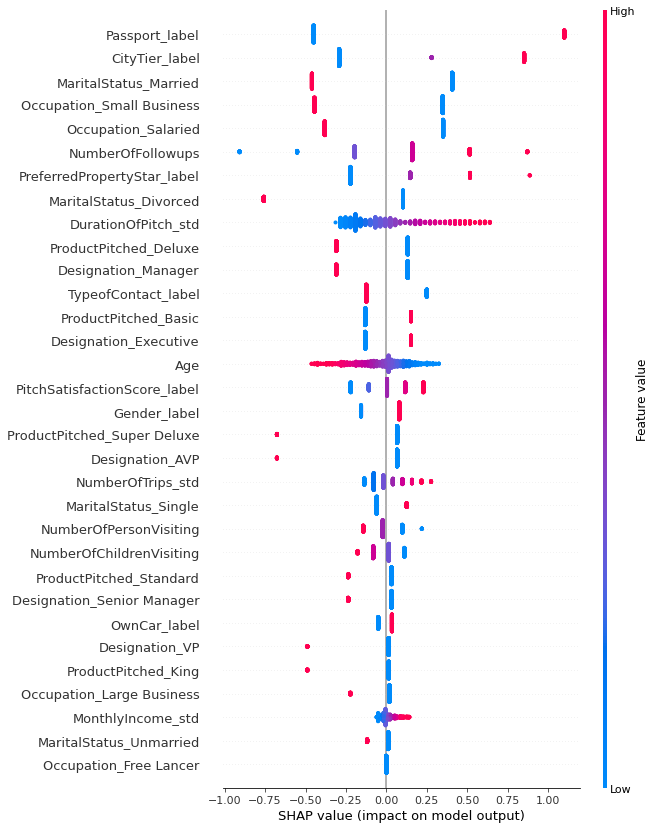

In [19]:
import shap

explainer = shap.Explainer(logres, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='dot', sort=True, max_display=32)

### Hyperparameter tuning

##### RandomizedCV, tanpa regularization

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# List Hyperparameters yang akan diuji
penalty = ['none']
hyperparameters = dict(penalty=penalty)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
modelRS = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
modelRS.fit(X_train, y_train)
y_pred_test = modelRS.predict(X_test)
eval_classification(modelRS, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.30
F1-Score (Test Set): 0.44
AUC: 0.64


In [21]:
from sklearn.metrics import precision_score

y_pred_train = modelRS.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))

Precision (Train Set): 0.70
Precision (Test Set): 0.82


Underfit/Bestfit?

##### GridSearchCV, tanpa regularization

In [22]:
from sklearn.model_selection import GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['none']
hyperparameters = dict(penalty=penalty)

# Inisiasi model
start = time.time()
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
modelGS = GridSearchCV(logres, hyperparameters, cv=5, scoring='precision')

# Fitting Model & Evaluation
modelGS.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = modelGS.predict(X_test)
eval_classification(modelGS, y_pred_test, X_train, y_train, X_test, y_test)

The time of execution of above program is : 0.3785068988800049
Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.30
F1-Score (Test Set): 0.44
AUC: 0.64


In [23]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[746,  13],
       [140,  59]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score

y_pred_train = modelGS.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))

Precision (Train Set): 0.70
Precision (Test Set): 0.82


Underfit/Bestfit?

##### Hyperparameter tuning (dengan regularization) dan RandomSearchCV 

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.005] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
modelRSreg = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
modelRSreg.fit(X_train, y_train)
y_pred_test = modelRSreg.predict(X_test)
eval_classification(modelRSreg, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 1.00
Recall (Test Set): 0.10
F1-Score (Test Set): 0.17
AUC: 0.55


In [26]:
y_pred_train = modelRSreg.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))

Precision (Train Set): 0.94
Precision (Test Set): 1.00


In [27]:
print('Best algorithm:', modelRSreg.best_estimator_.get_params()['penalty'])
print('Best C:', modelRSreg.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.005


---

## Decision Tree

In [28]:
X = df.drop(columns=['CustomerID','ProdTaken'])
y = df['ProdTaken']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
end = time.time()
print("The time of execution of above program is :", end-start)
y_pred_test = model.predict(X_test)

The time of execution of above program is : 0.042443037033081055


### Evaluation

In [30]:
eval_classification(model, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.78
Recall (Test Set): 0.71
F1-Score (Test Set): 0.74
AUC: 0.83


In [31]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[720,  39],
       [ 58, 141]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score

y_pred_train = model.predict(X_train)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 1.0
Precision (Test Set):0.7833333333333333


Overfit

### Regularization

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
start = time.time()
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

# Predict & Evaluation
y_pred_test = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred_test, X_train, y_train, X_test, y_test)

The time of execution of above program is : 0.5499260425567627
Accuracy (Test Set): 0.83
Precision (Test Set): 0.74
Recall (Test Set): 0.27
F1-Score (Test Set): 0.39
AUC: 0.62


In [34]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[740,  19],
       [146,  53]], dtype=int64)

In [35]:
from sklearn.metrics import precision_score

y_pred_train = model.predict(X_train)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 0.7048192771084337
Precision (Test Set):0.7361111111111112


Best Fit tetapi nilai masih rendah

### Bagging: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = rf.predict(X_test)
eval_classification(rf, y_pred_test, X_train, y_train, X_test, y_test)

The time of execution of above program is : 0.6101374626159668
Accuracy (Test Set): 0.90
Precision (Test Set): 0.99
Recall (Test Set): 0.53
F1-Score (Test Set): 0.69
AUC: 0.76


In [37]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[758,   1],
       [ 94, 105]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score

y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 1.0
Precision (Test Set):0.9905660377358491


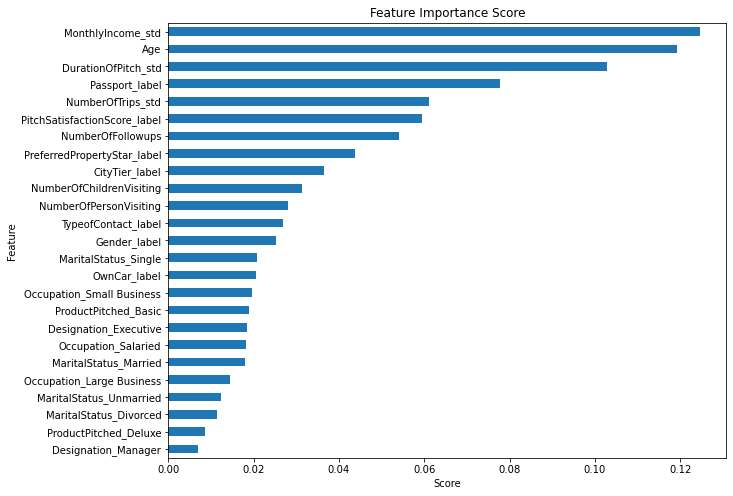

In [39]:
show_feature_importance(rf)

https://analyticsindiamag.com/hands-on-guide-to-interpret-machine-learning-with-shap/

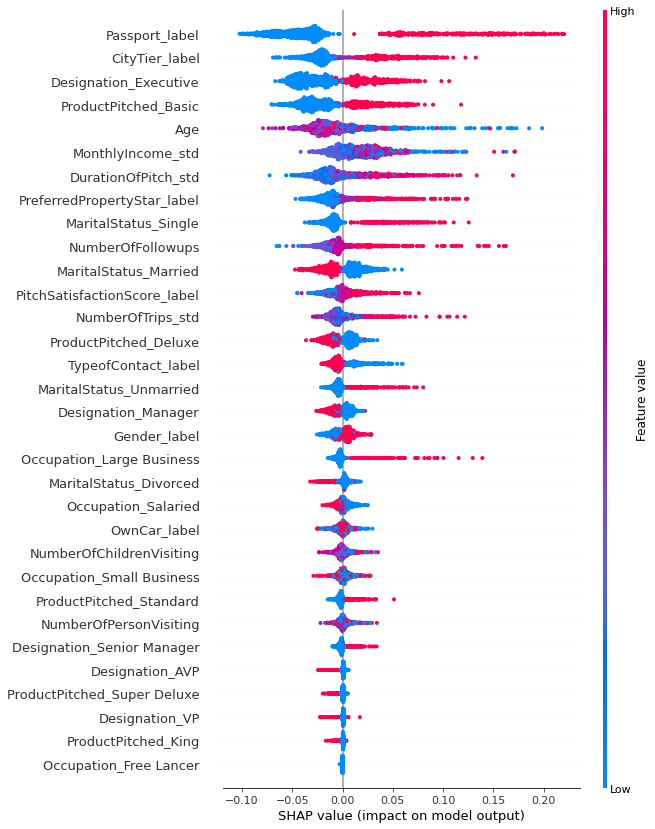

In [40]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, sort=True, max_display=32)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(X_train,y_train)
y_pred_test = rf_tuned.predict(X_test)

# Predict & Evaluation
eval_classification(rf_tuned, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 1.00
Recall (Test Set): 0.47
F1-Score (Test Set): 0.64
AUC: 0.74


In [42]:
from sklearn.metrics import precision_score
y_pred_train = rf_tuned.predict(X_train)
y_pred = rf_tuned.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 1.0
Precision (Test Set):1.0


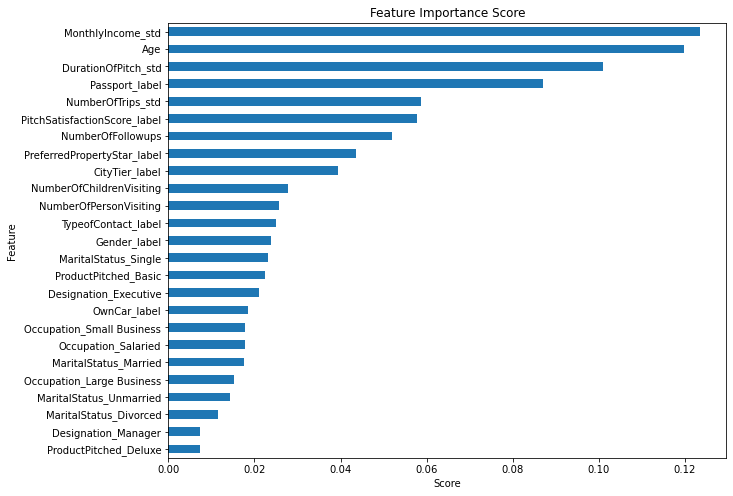

In [43]:
show_feature_importance(rf_tuned.best_estimator_)

---

## XGBoost

In [44]:
X = df.drop(columns=['CustomerID','ProdTaken'])
y = df['ProdTaken']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
from xgboost import XGBClassifier

start = time.time()
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = xg.predict(X_test)
eval_classification(xg, y_pred_test, X_train, y_train, X_test, y_test)

[21:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The time of execution of above program is : 0.36687397956848145
Accuracy (Test Set): 0.93
Precision (Test Set): 0.95
Recall (Test Set): 0.70
F1-Score (Test Set): 0.81
AUC: 0.85


In [46]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[752,   7],
       [ 59, 140]], dtype=int64)

In [47]:
from sklearn.metrics import precision_score
xg.fit(X_train, y_train)
y_pred_train = xg.predict(X_train)
y_pred = xg.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

[21:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision (Train Set): 1.0
Precision (Test Set):0.9523809523809523


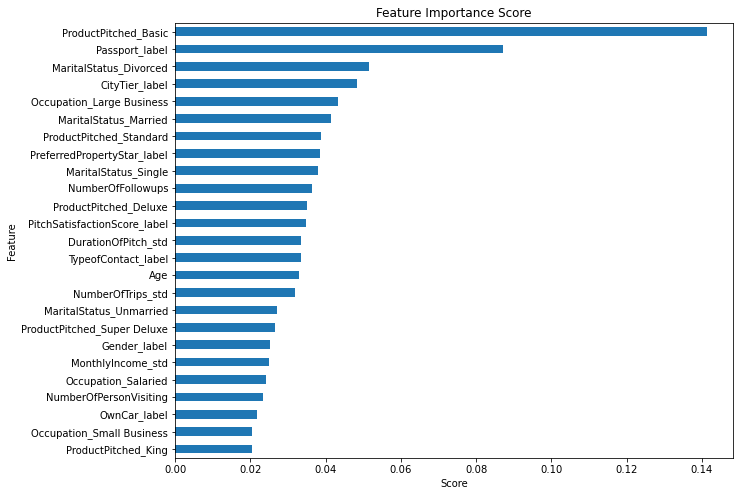

In [48]:
show_feature_importance(xg)

### Hyperparameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(X_train,y_train)
y_pred_test = xg_tuned.predict(X_test)

# Predict & Evaluation
eval_classification(xg_tuned, y_pred_test, X_train, y_train, X_test, y_test)

[21:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [50]:
from sklearn.metrics import precision_score
xg_tuned.fit(X_train, y_train)
y_pred_train = xg_tuned.predict(X_train)
y_pred = xg_tuned.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

[21:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

---

## KNN

In [51]:
X = df.drop(columns=['CustomerID','ProdTaken'])
y = df['ProdTaken']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
start = time.time()
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = knn.predict(X_test)

The time of execution of above program is : 0.0030434131622314453


### Evaluation

In [52]:
eval_classification(model, y_pred_test, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.41
F1-Score (Test Set): 0.56
AUC: 0.70


In [53]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[748,  11],
       [118,  81]], dtype=int64)

In [54]:
from sklearn.metrics import precision_score
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 0.9127789046653144
Precision (Test Set):0.8804347826086957


Overfit/Bestfit?

### Regularization

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
start = time.time()
knn_tuned = KNeighborsClassifier()
model = RandomizedSearchCV(knn_tuned, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
end = time.time()
print("The time of execution of above program is :", end-start)

y_pred_test = model.predict(X_test)
eval_classification(model, y_pred_test, X_train, y_train, X_test, y_test)

The time of execution of above program is : 4.0592639446258545
Accuracy (Test Set): 0.82
Precision (Test Set): 0.83
Recall (Test Set): 0.15
F1-Score (Test Set): 0.25
AUC: 0.57


In [56]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_test)
cf

array([[753,   6],
       [170,  29]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print("Precision (Train Set): " +str(precision_score(y_train, y_pred_train)))
print("Precision (Test Set):" +str(precision_score(y_test, y_pred_test)))

Precision (Train Set): 0.8742857142857143
Precision (Test Set):0.8285714285714286


In [58]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 12
Best p: 2
Best algorithm: brute


## Conclusion

1. **Logistic Regression**
    - Precision (Train Set): 0.70
    - Precision (Test Set): 0.81
    - Accuracy (Test Set): 0.84
    - Recall (Test Set): 0.31
    - Result: Bestfit, presisi cukup tinggi, recall rendah

    Hyperparameter Tuning (tanpa regularization) dan GridsearchCV
    - Precision (Train Set): 0.70
    - Precision (Test Set): 0.82
    - Accuracy (Test Set): 0.84
    - Recall (Test Set): 0.30
    - Result: Bestfit, presisi cukup tinggi, recall rendah

2. **Decision Tree**
    - Precision (Train Set): 1.0
    - Precision (Test Set): 0.78
    - Accuracy (Test Set): 0.90
    - Recall (Test Set): 0.71
    - Result: Overfit, presisi dan recall moderate 

    Hyperparameter Tuning - Regularization
    - Precision (Train Set): 0.71
    - Precision (Test Set): 0.74
    - Accuracy (Test Set): 0.83
    - Recall (Test Set): 0.27
    - Result: Bestfit, presisi moderate, recall rendah


3. **Bagging - Random Forest**
    - Precision (Train Set): 1.0
    - Precision (Test Set): 0.99
    - Accuracy (Test Set): 0.90
    - Recall (Test Set): 0.53
    - Result: Bestfit, presisi tinggi, recall rendah
    
    
4. **KNN**
    - Precision (Train Set): 0.91
    - Precision (Test Set): 0.88
    - Accuracy (Test Set): 0.87
    - Recall (Test Set): 0.41
    - Result: Bestfit, akurasi cukup tinggi, recall rendah


    Hyperparameter Tuning - Randomized Search
    - Precision (Train Set): 0.88
    - Precision (Test Set): 0.83
    - Accuracy (Test Set): 0.82
    - Recall (Test Set): 0.15
    - Result: Bestfit, akurasi cukup tinggi, recall rendah
    
5. **XGBoost**
    - Precision (Train Set): 1.0
    - Precision (Test Set): 0.95
    - Accuracy (Test Set): 0.93
    - Recall (Test Set): 0.70
    - Result: Bestfit, presisi tinggi, recall cukup tinggi

### Model terbaik

**XGBoost**
    
    - Precision (Train Set): 1.0
    - Precision (Test Set): 0.95
    - Accuracy (Test Set): 0.93
    - Recall (Test Set): 0.70
    - Result: Bestfit, presisi tinggi, recall cukup tinggi

    - True Positive: 140
    - True Negative: 752
    - False Positive: 7
    - False Negative: 59